<img src="https://drive.google.com/uc?export=view&id=1x-QAgitB-S5rxGGDqxsJ299ZQTfYtOhb" width=180, align="center"/>

Master's degree in Intelligent Systems

Subject: 11754 - Deep Learning

Year: 2023-2024

Professor: Miguel Ángel Calafat Torrens

# Lab 3 - Pytorch

[PyTorch](http://pytorch.org/) is a Python library that is designed to be able to develop high-level _Deep Learning_ jobs. It has the advantage of being quite easy to understand compared to other platforms.

In a way, pytorch can be used quite similarly to numpy. In previous labs, numpy has been used to deal with numpy-arrays, which are basically vectors and matrices. In this case, pytorch works with tensors, which is the same, but admitting more dimensions. Ultimately, tensors are arrays; when they have a single dimension we call them vectors, when they have two dimensions we call them matrices, and when they have more dimensions we simply call them tensors.

Pytorch tensors have a number of features that make them easy to use, such as the ability to run on a GPU or the fact that they are optimized for automatic differentiation. Otherwise, its use from a mathematical point of view is quite similar to the use you have already tried with numpy. Many of the features you saw in numpy are available in Pytorch. Some of the most relevant are listed below:

* torch.tensor()  --> It creates a tensor. The different data types are available [here](https://pytorch.org/docs/stable/tensors.html)
* torch.zeros()  --> It creates a zeros tensor.
* torch.zeros_like()  --> It creates a zeros tensor with the shape of a given tensor.
* torch.ones()  --> It creates a ones tensor.
* torch.ones_like()  --> It creates a ones tensor with the shape of a given tensor.
* torch.full()  --> It creates a tensor of constant values.
* torch.full_like()  --> It creates a tensor of constant values with the shape of a given tensor.
* torch.rand()  --> It creates a tensor of random numbers between 0 and 1.
* torch.rand_like()  --> It creates a tensor of random numbers between 0 and 1 with the shape of a given tensor.
* torch.randn()  --> It creates a tensor of random numbers between 0 and 1, following a normal distribution.
* torch.randn_like()  --> It creates a tensor of random numbers between 0 and 1, following a normal distribution, and with the shape of a given tensor.
* torch.arange()  --> It creates a tensor from a specified sequence.
* torch.linspace()  --> It creates a tensor from a specified sequence.
* torch.cat()  --> It concatenates tensors.
* torch.split()  --> It splits tensors.
* torch.squeeze()  --> It returns a tensor that removes dimensions with value 1.
* torch.unsqueeze()  --> It returns a new tensor to which it adds a dimension at the specified position
* torch.reshape()  --> It returns a tensor with the specified shape.
* torch.from_numpy()  --> It creates a tensor from a numpy-array.
* tensor.numpy()  --> It creates a numpy-array from a tensor.

In addition, you will also find basic mathematical operations such as: _abs, add, div, mult, sub, ceil, floor, sqrt, exp, log, round, power_, etc.

In [1]:
# This cell connects to your drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Colab Notebooks/deep learning/LAB3'
%ls -l

# Here the path of the project folder (which is where this file is) is inserted
# into the python path. There's nothing to do; just execute the cell.
import pathlib
import sys

PROJECT_DIR = str(pathlib.Path().resolve())
sys.path.append(PROJECT_DIR)

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/deep learning/LAB3
total 73
-rw------- 1 root root 10767 Mar 25 14:41 helper_PR3.py
-rw------- 1 root root 25032 Mar 25 14:44 LAB-3.ipynb
-rw------- 1 root root 37728 Mar 25 14:46 LSS3-Pytorch.ipynb


In [2]:
# Importing some libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import helper_PR3 as hp
from google.colab import files

In [3]:
# This is a way to view the content of the help file without having to edit it
# in a new tab. You can also browse to it through the left bar.
files.view('helper_PR3.py')

<IPython.core.display.Javascript object>

You probably remember that in the last lab we defined an activation function called sigmoid. In that case numpy was used:
```
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
```

Note how doing the same in pytorch is straightforward (just replace `np.exp` with `torch.exp`). Let's define a function that can handle both objects.

In [4]:
def sigmoid(x):
    try:
        out = 1 / (1 + torch.exp(-x))
    except:
        out = 1 / (1 + np.exp(-x))
    finally:
        return out

In [5]:
# Random seed is selected to ensure reproducibility
np.random.seed(42)
torch.manual_seed(42)

## Gradient calculation in numpy and pytorch

### _Forward pass_

Next, the calculation of the forward pass is broken down step by step, both in numpy and in pytorch for the case of the perceptron. The goal is not really to learn how to do this step by step, but rather to lay the groundwork for understanding how automatic gradient calculation works in pytorch.

<img src="https://drive.google.com/uc?export=view&id=1as6Vm-uivPHatB_ly73LlxEr2n9wHPDw" width=600>

In [6]:
# A test dot with three coordinates is created. The third coordinate is 1,
# and is used to calculate the weight of the bias.

# This is a case analogous to the one seen in the previous lab. In this case,
# for clarity, instead of an array of dots, the calculation is done with
# a single dot.

# Dot x in numpy
np_x = np.array([[0.5, 0.7, 1.0]], dtype=np.float32)
print(f'np_x shape: {np_x.shape}')

# Dot x in pytorch
tr_x = torch.from_numpy(np_x)
print(f'tr_x shape: {tr_x.shape}')

np_x shape: (1, 3)
tr_x shape: torch.Size([1, 3])


In [7]:
# Some initial weights are defined to put them into the matrix of weights W
weight1 = 0.1
weight2 = 1.0
bias = -0.6

# An np-array and a tensor are created with the initial weights
tr_W = torch.tensor([[weight1], [weight2], [bias]], dtype=torch.float32)
np_W = tr_W.numpy().copy()

print(f'np_W shape:{np_W.shape}\n{np_W}\n')
print(f'tr_W shape:{tr_W.shape}\n{tr_W}')

np_W shape:(3, 1)
[[ 0.1]
 [ 1. ]
 [-0.6]]

tr_W shape:torch.Size([3, 1])
tensor([[ 0.1000],
        [ 1.0000],
        [-0.6000]])


Tensor objects, unlike numpy-array objects, have a property called `requires_grad`. This property, which returns a Boolean value, indicates whether automatic gradient calculation is enabled or not. In this case, we're
interested in it being enabled. It is set to `True` since when building the tensors this property comes by default to `False`.

In [8]:
# The requires_grad property of this tensor is activated
# (the default value is disabled)
tr_W.requires_grad = True

In [9]:
# The linear combination h is calculated

# Case numpy
np_h = np.dot(np_x, np_W)
print(f'np_h value: {np_h.item():.6f}')

# Case pytorch
tr_h = torch.mm(tr_x, tr_W)
print(f'tr_h value: {float(tr_h):.6f}')

np_h value: 0.150000
tr_h value: 0.150000


In [10]:
# The predicted output is calculated by applying the activation function
np_yp = sigmoid(np_h)
print(f'numpy yp value: {np_yp.item():.6f}')

tr_yp = sigmoid(tr_h)
print(f'pytorch yp value: {float(tr_yp):.6f}')

numpy yp value: 0.537430
pytorch yp value: 0.537430


In [11]:
# The current correct output is selected.

np_y = np.zeros((1, 1), dtype=np.float32)
print(f'np_yp shape: {np_y.shape}')

tr_y = torch.from_numpy(np_y)
print(f'tr_yp shape: {tr_y.shape}')

np_yp shape: (1, 1)
tr_yp shape: torch.Size([1, 1])


### Loss functions (lossFcn)

In the previous lab, a loss function was used that calculated the squared error. In this case, both numpy and pytorch will do the same thing; however in pytorch a predefined function will be used.

To use the default loss functions in pytorch see the following [link](https://pytorch.org/docs/stable/nn.html#loss-functions)

In [12]:
# Calculation of losses in numpy
# As losses, as was done in the previous practice, the squared differences are
# used. In this case, the scaling factor 2 is eliminated.
np_loss = np.square(np_y - np_yp)
print(f"loss value: {np_loss.item():.6f}")

loss value: 0.288831


In [13]:
# Calculation of losses in pytorch

# Import the neural networks module
from torch import nn

# The MSELoss function will be used, which means Mean Squared Error Loss,
# that is, the loss function that calculates the mean squared error. This is
# the same as what was done in numpy in the previous cell
criterion = nn.MSELoss()
tr_loss = criterion(tr_yp, tr_y)
print(f'loss vale: {float(tr_loss):.6f}')

loss vale: 0.288831


### Backpropagation

Now it's time to start backpropagation. As a reminder and as a check of the result, it is done first step by step in numpy and afterwards it is done in pytorch.

In [14]:
# Backpropagation

# Output derivative
np_dyp_dh = np_yp * (1 - np_yp)

# Error term delta
np_delta = -2 * (np_y - np_yp) * np_dyp_dh

# W increments (prior to multiplication by lr)
np_incW = np.dot(np_x.T, np_delta)

print(f'The W increment is:\n{np_incW}')

The W increment is:
[[0.13360451]
 [0.18704632]
 [0.26720902]]


Next, notice how backpropagation in pytorch is much easier.

Previously, the `requires_grad` property of tensor W has been enabled. Due to this, pytorch has been remembering the operations that have been carried out. When the `.backward()` method is applied to the losses, all tensors that have been passed to it with the `requires_grad` property enabled will have the corresponding gradient calculated, which will be stored in the tensor's `.grad` property.

In [15]:
# Backpropagation using pytorch
tr_loss.backward()  # Enabled tensors' gradient's calculation

# Returns the gradient of the tensor tr_W
print(f'The W increment is:\n{tr_W.grad}')

The W increment is:
tensor([[0.1336],
        [0.1870],
        [0.2672]])


Finally, with the calculated gradients, we would just need to update the weights and continue with the training. Later on, it will be seen how to do this automatically.

## Building neural networks in pytorch

Pytorch provides a module for creating neural network type objects. The bases for its use are developed below.

First of all, don't forget that you must have imported the nn module from torch. It is common to directly name it as nn.

The class to be defined will be a child class of the nn.Module class.

At least two methods must be defined:
* The `__init__` method: It will define the different components of the neural network; that is, its layers. By overriding this method, you must necessarily use `super()` to import the properties of the parent class.
* The `forward` method: This method is the one that will be in charge of doing all the calculations of the forward step.

Let's see a simple example.

In [16]:
# Example of a simple neural network

# First, the class to be created is indicated, which will inherit all its
# attributes from the parent class nn.Module
class Network_1(nn.Module):
    # The __init__ method is defined, which is the one that initializes the
    # current instance of the object
    def __init__(self):
        # Attributes of the parent class are imported
        super().__init__()

        # The different types of layers that will be in the neural network are
        # defined as modules. See https://pytorch.org/docs/stable/nn.html

        # The first layer is a linear layer; that is, made up of perceptrons.
        # We named it fc for 'fully connected'. It is also called a dense layer.
        # Notice that this layer only does the linear combination; that is, it
        # does not have any activation function.
        self.fc = nn.Linear(in_features=2, out_features=1, bias=True)

        # Activation layer. We use the sigmoid function layer.
        self.sigmoid = nn.Sigmoid()

    # The method for the forward pass is defined
    def forward(self, x):
        # The inputs will be propagated forward through all the defined layers.
        # The behavior is specified by each function.
        x = self.fc(x)
        x = self.sigmoid(x)

        return x

In this same exercise, in a previous task, the output of a neural network consisting of only one perceptron has been calculated, based on an input with two coordinates. In that case, the coordinates of dot x were 0.5 and 0.7 respectively (before, a third coordinate with value 1 has been set to emulate the bias), the weights were 0.1, 1.0 and -0.6 (the latter is the bias). The result obtained at the output has been ŷ = 0.537430. Now let's compare with the functionality of the new network.

In [17]:
# A new object if the class Network_1 is instantiated
model = Network_1()

### Objects exploration

Before we can continue with the emulation of the previous result, it is necessary the initial weights to be entered in the network. Weight initialization will be discussed in detail later; but now we are going to see how this verification could be done quickly.

In general, it is convenient to know how to explore objects in python, since there can be a lot of hidden information in them that can be extracted without having to go looking for the specifications or the source code. If you type `dir(model)` you will get a list of all the methods and properties of the given object. In principle you can skip all the ones that start with an underscore, and go directly to the others. You will see that there is a property called `fc`, which refers to the dense layer that has been defined in the `__init__` method by doing `self.fc = ...`

In [18]:
# In this case, instead of using dir(), you can use a helper function (open
# the helper_PR3.py file for details). This function makes use of 'dir()', but
# it makes it easier to get just the properties or methods of an object.

# print(dir(model))
print(hp.inspect_obj(model)['methods'])

['add_module', 'apply', 'bfloat16', 'buffers', 'children', 'compile', 'cpu', 'cuda', 'double', 'eval', 'extra_repr', 'fc', 'float', 'forward', 'get_buffer', 'get_extra_state', 'get_parameter', 'get_submodule', 'half', 'ipu', 'load_state_dict', 'modules', 'named_buffers', 'named_children', 'named_modules', 'named_parameters', 'parameters', 'register_backward_hook', 'register_buffer', 'register_forward_hook', 'register_forward_pre_hook', 'register_full_backward_hook', 'register_full_backward_pre_hook', 'register_load_state_dict_post_hook', 'register_module', 'register_parameter', 'register_state_dict_pre_hook', 'requires_grad_', 'set_extra_state', 'share_memory', 'sigmoid', 'state_dict', 'to', 'to_empty', 'train', 'type', 'xpu', 'zero_grad']


Obviously the weights have to be somewhere in `model.fc`. You can continue exploring it with dir() and type(), or keep using the help function.

In [19]:
# Explore the fc layer
# Note how it has a property called weight and another called bias. These are
# the weights we're searching for.

# print(dir(model.fc))
print(hp.inspect_obj(model.fc)['attributes'])

['T_destination', 'add_module', 'apply', 'bfloat16', 'bias', 'buffers', 'call_super_init', 'children', 'compile', 'cpu', 'cuda', 'double', 'dump_patches', 'eval', 'extra_repr', 'float', 'forward', 'get_buffer', 'get_extra_state', 'get_parameter', 'get_submodule', 'half', 'in_features', 'ipu', 'load_state_dict', 'modules', 'named_buffers', 'named_children', 'named_modules', 'named_parameters', 'out_features', 'parameters', 'register_backward_hook', 'register_buffer', 'register_forward_hook', 'register_forward_pre_hook', 'register_full_backward_hook', 'register_full_backward_pre_hook', 'register_load_state_dict_post_hook', 'register_module', 'register_parameter', 'register_state_dict_pre_hook', 'requires_grad_', 'reset_parameters', 'set_extra_state', 'share_memory', 'state_dict', 'to', 'to_empty', 'train', 'training', 'type', 'weight', 'xpu', 'zero_grad']


In [20]:
# Determine the type of object for model.fc.weight and model.fc.bias
print(type(model.fc.weight))
print(type(model.fc.bias))

# If possible, print out the contents of model.fc.weight
print(model.fc.weight)

<class 'torch.nn.parameter.Parameter'>
<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([[0.5406, 0.5869]], requires_grad=True)


In [21]:
# These are objects of type Parameter. Beyond the specifications
# of this type of object, it is clear that they contain a tensor whose values
# constitute the weights we are looking for. Let's see what properties they have.
# Some of them will allow us to access the weights.

# print(dir(model.fc.weight))
print(hp.inspect_obj(model.fc.weight)['attributes'])

['H', 'T', 'abs', 'abs_', 'absolute', 'absolute_', 'acos', 'acos_', 'acosh', 'acosh_', 'add', 'add_', 'addbmm', 'addbmm_', 'addcdiv', 'addcdiv_', 'addcmul', 'addcmul_', 'addmm', 'addmm_', 'addmv', 'addmv_', 'addr', 'addr_', 'adjoint', 'align_as', 'align_to', 'all', 'allclose', 'amax', 'amin', 'aminmax', 'angle', 'any', 'apply_', 'arccos', 'arccos_', 'arccosh', 'arccosh_', 'arcsin', 'arcsin_', 'arcsinh', 'arcsinh_', 'arctan', 'arctan2', 'arctan2_', 'arctan_', 'arctanh', 'arctanh_', 'argmax', 'argmin', 'argsort', 'argwhere', 'as_strided', 'as_strided_', 'as_strided_scatter', 'as_subclass', 'asin', 'asin_', 'asinh', 'asinh_', 'atan', 'atan2', 'atan2_', 'atan_', 'atanh', 'atanh_', 'backward', 'baddbmm', 'baddbmm_', 'bernoulli', 'bernoulli_', 'bfloat16', 'bincount', 'bitwise_and', 'bitwise_and_', 'bitwise_left_shift', 'bitwise_left_shift_', 'bitwise_not', 'bitwise_not_', 'bitwise_or', 'bitwise_or_', 'bitwise_right_shift', 'bitwise_right_shift_', 'bitwise_xor', 'bitwise_xor_', 'bmm', 'bool',

In [22]:
# You'll see that it has a lot of properties and methods, many of which look
# like tensor methods.

# There is a property called 'data'. This property contains the data we are
# looking for.
print(type(model.fc.weight.data))

# As you can see, it's a tensor
print(model.fc.weight.data)

<class 'torch.Tensor'>
tensor([[0.5406, 0.5869]])


In [23]:
# Now, since we already know how to create tensors, we are ready to replace
# the given weight tensor with the one we consider appropriate

# A tensor of the required dimensions is created
W = torch.ones_like(model.fc.weight.data, dtype=torch.float32)

# Se le asignan los valores que se quieren probar
W[0, 0], W[0, 1] = 0.1, 1.0

# This tensor is assigned to the model weights
model.fc.weight.data = W

In [24]:
# Do the same with the bias
# Create a tensor of the required dimensions
b = torch.ones_like(model.fc.bias.data, dtype=torch.float32)

# Assign the values to be tested
b[0] = -0.6

# Assign this tensor to the model weights
model.fc.bias.data = b

### Checking _forward pass_

At this point you are ready to carry out the test in order to verify that the network works as expected. The expected output is `ŷ = 0.537430`

In [25]:
# Test point x is defined
x = torch.tensor([[0.5, 0.7]], dtype=torch.float32)

# Forward pass is carried out
output = model.forward(x)

print('Expected output = 0.537430   Real output = {:.6}'.format(float(output.data)))

Expected output = 0.537430   Real output = 0.53743


At this point you are already sure that the model works perfectly with regard to the forward pass.

### Other ways to define the model

The explained way of defining the neural network model is not the only one that can be done in pytorch. There are other ways to do it that at some point may be convenient, especially when it comes to small networks, as in this case.

The first alternative shown below is to use the activation functions as functions and not as layers (as they were defined in the previous model). The code would be as shown below.

In [26]:
# Simple neural network example defining activation functions with "functional"

class Network_2(nn.Module):
    # The __init__ method is defined, which is the one that initializes the
    # current instance of the object
    def __init__(self):
        # The attributes of the parent class are imported
        super().__init__()

        # The linear layer is defined.
        # ACTIVATION LAYERS ARE NOT DEFINED
        self.fc = nn.Linear(in_features=2, out_features=1, bias=True)


    # The method for the forward pass is defined
    def forward(self, x):
        # The activation function is applied to the output of the dense layer
        x = torch.sigmoid(self.fc(x))

        return x

model_2 = Network_2()

There is a third, even simpler way of defining the model. In this case, a new class is not created explicitly, but the model would be created directly using pytorch tools.

It consists of specifying the different layers directly in the call.

In [27]:
# First of all we import OrderedDict
from collections import OrderedDict

# nn.Sequential is used to specify each layer, being able to refer to each
# one of them by name
model_3 = nn.Sequential(OrderedDict([('fc', nn.Linear(2, 1)),
                                     ('sigmoid', nn.Sigmoid())]))

Note that the above way is much faster for small networks. In fact, it wasn't really necessary to use an ordered dictionary; the definition could be done directly, without reference to layer names. It would be as follows:
```
model = nn.Sequential(nn.Linear(2, 1),
                      nn.Sigmoid())
```

Logically, for any network of a certain entity, it is recommended to use the versions that define a new class.

Let's see below how all versions work the same.

In [28]:
# Version 1:

W = model.fc.weight.data.clone()
b = model.fc.bias.data.clone()
print(model.forward(x))

tensor([[0.5374]], grad_fn=<SigmoidBackward0>)


In [29]:
# Version 2:

model_2.fc.weight.data = W.clone()
model_2.fc.bias.data = b.clone()
print(model_2.forward(x))

tensor([[0.5374]], grad_fn=<SigmoidBackward0>)


In [30]:
# Version 3:

model_3.fc.weight.data = W.clone()
model_3.fc.bias.data = b.clone()
print(model_3.forward(x))

tensor([[0.5374]], grad_fn=<SigmoidBackward0>)


## Weights initialization

In the previous exercises you have seen that, in order to reproduce the same results, the weights were initialized to certain values. In the networks seen in this course, this initialization may not be very relevant; however, in large networks that take a long time to train, it is desirable to initialize the values in such a way that the training time can be reduced.

In general, it is considered that in a linear network the best initialization is one in which the weights will be close to 0, but without being too small or equal to each other. So, for example, an initialization with all weight values set to zero would not be a good idea.

When defining a neural network with linear layers in pytorch the weights are initialized by default following a given distribution; however, there is the possibility of initializing the values of the weights according to various distributions. This is done by using `nn.init`. See all the options in: https://pytorch.org/docs/1.9.1/nn.init.html?highlight=init


In general, the initialization of weights does not cause problems; however, note that the weights are tensors with the _requires_grad_ property enabled by default. Any manipulation in them once the training has started may have an effect on the calculation of the gradient. Therefore, it is a good practice, if this is the case, to disable the calculation of gradients. This can be done directly or by making the changes within a block `with torch.no_grad():`
```
with torch.no_grad():
    model.fc.weight = nn.Parameter(torch.randn_like(model.fc.weight))
```

In [31]:
# Let's look at the set of weights of the model object
print(model.fc.weight)

Parameter containing:
tensor([[0.1000, 1.0000]], requires_grad=True)


In [32]:
# Initialization of values following a uniform distribution
nn.init.uniform_(model.fc.weight.data)

# Notice that this instruction is executed in-place; that is, the tensor
# has been modified
print(model.fc.weight)

Parameter containing:
tensor([[0.1332, 0.9346]], requires_grad=True)


In [33]:
# As an example let's see other possible initializations
# Initialization of values following a normal distribution
nn.init.normal_(model.fc.weight.data)
print(model.fc.weight)

# Initialization of values following a constant distribution
nn.init.constant_(model.fc.weight.data, 0.5)
print(model.fc.weight)

# Initialization of values following a kaiming uniform distribution
nn.init.kaiming_uniform_(model.fc.weight.data)
print(model.fc.weight)

Parameter containing:
tensor([[-0.0107, -1.2492]], requires_grad=True)
Parameter containing:
tensor([[0.5000, 0.5000]], requires_grad=True)
Parameter containing:
tensor([[-0.2445,  1.3352]], requires_grad=True)


Once you see this, you are ready to answer the following question:

What initial distribution does pytorch default to linear layers, and with what parameters?

For this, the following [link](https://github.com/pytorch/pytorch/blob/master/torch/nn/modules/linear.py) is provided, where you can find the source code of the linear layers .

**Answer:**

It initializes them with the kaiming_uniform function. You just have to follow the code.

On the other hand, you have seen that the nn.init function is used to initialize values of the weights of a single layer. In the most common case you will have more than one layer. To do the initialization of all layers you can pass a custom initialization function to `nn.Module.apply`

In [34]:
# Custom function for initializing weights in linear layers
def init_linear_weights(my_module):
    # Check if it is a linear layer instance
    if isinstance(my_module, nn.Linear):
        torch.nn.init.kaiming_normal_(my_module.weight.data)
        torch.nn.init.constant_(my_module.bias.data, 0.05)

# The way to apply the function would be
model.apply(init_linear_weights)

Network_1(
  (fc): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

## The training

At this point it seems that all the ingredients are already there to be able to do a basic training. You already know how to operate with tensors, define neural networks, do the forward pass and the backward pass. We also know how to initialize the weights if required. So let's go.


### Problem definition
In principle, the first idea is to do basic training. In this case we will try to adjust a network so that it can indicate if a determined dot of the plane belongs to one class or another. This is the same problem that was developed in the previous lab.

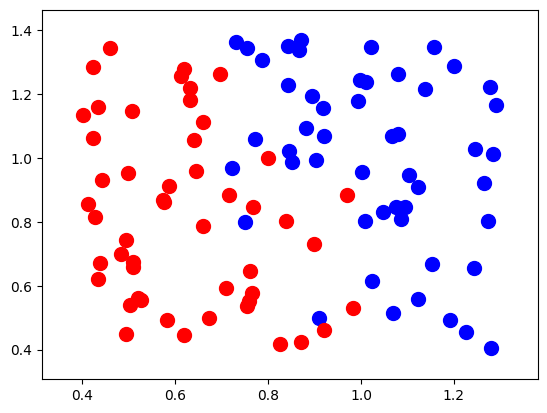

In [35]:
# Creation of a cloud of dots.
# dots_gt is short for dots ground truth
# dots_tst is short for dots test
np.random.seed(0)

# Two np-array with shapes 3 x n_dots are generated
dots_tst, dots_gt = hp.p_gen3(100)

# Data adaptation (this is to fit the data type)
# They are cast to float32
# dots_gt = dots_gt.astype(dtype=np.float32)
# dots_tst = dots_tst.astype(dtype=np.float32)

# Visualization of the cloud
hp.my_plot(dots_gt, dots_gt)

### The inputs
The input to the system will be a dot tensor. Right now we have the numpy-array called _dots_gt_. It is a matrix with 3 rows and 100 columns. In the first row there are the x coordinates of the dots, in the second row there are the y coordinates, while in the third row there are the labels (0 -> red, 1 -> blue)

In [36]:
# The system inputs will be the x and y coordinates, which correspond to rows 0
# and 1 of the np-array dots
print(dots_gt.shape)

# Let's look at the first few points. Notice how the points are already
# mixed up; that is, not all the reds are together, but both red and blue
# appear interchangeably
print(dots_gt[:, :13])

(3, 100)
[[1.0801178  0.98194593 1.27227    1.1909231  0.6120572  0.5100427
  0.45961472 1.2789093  0.89946556 1.0943068  0.8510694  0.84523314
  0.4123507 ]
 [1.2629778  0.52939    0.80372006 0.49328503 1.2566223  0.67335516
  1.3436064  0.40347606 0.73126113 0.8462795  0.9871832  1.0209261
  0.8546602 ]
 [1.         0.         1.         1.         0.         0.
  0.         1.         0.         1.         1.         1.
  0.        ]]


In [37]:
# In order to emulate loading data in batches, we are going to resize the inputs
# considering batch = 20 (the dots will enter in batches of 20 elements)
inputs = torch.from_numpy(dots_gt[:2, :]).reshape(2, 20, -1).permute(2, 1, 0)
labels = torch.from_numpy(dots_gt[2, :]).reshape(1, 20, -1).permute(2, 1, 0)

# There will be 5 batches of 20 points each batch with two coordinates each
# point so that a scan can be made by the first coordinate of inputs and outputs
print(inputs.shape)

torch.Size([5, 20, 2])


### The neural network

At this point we are going to see the behavior of the most basic network possible, the perceptron.

In [38]:
class Network_01(nn.Module):

    def __init__(self):
        super().__init__()
        # Dense layer
        self.fc1 = nn.Linear(in_features=2, out_features=1, bias=True)
        # Activation layer
        self.sigmoid = nn.Sigmoid()


    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        return x

SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)
model = Network_01()

### The optimizer

Backpropagation has been explained at the time; but the pytorch example ended at the point where the weight gradients were calculated; that is, the algorithm was not finished.

Pytorch has a certain type of object that is in charge of applying a specific optimization algorithm to the indicated tensors. It also controls a series of additional parameters such as the learning rate (_learning rate_) or the reset of gradients. This type of object is the [_optimizer_](https://pytorch.org/docs/1.10.1/optim.html?highlight=optimizer#torch.optim.Optimizer)


In [39]:
from torch import optim

# We will use the optimizer with the SGD algorithm (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.1)

The optimizer will control the first and the last step of the algorithm. The first is to reset the current epoch gradients (with `optimizer.zero_grad()`) and the last is an optimization step and update weights (with `optimizer.step()`.

### The loss function

In this case, as seen in the previous examples, we will use the root mean square error.

In [40]:
criterion = nn.MSELoss()

### The algorithm

Let's go with the algorithm. A detail to take into account is that in each epoch you have to reset the gradients (set them to zero). This is necessary because we only want them to be calculated on the operations of each single epoch, and not on all the accumulated history.

In [41]:
epochs = 1000

for epoch in range(epochs):
    batch_loss = 0.0
    for Xb, Yb in zip(inputs, labels):
        # Training step
        #_______________________________________________________________________
        # Reset gradients
        optimizer.zero_grad()

        # Forward pass
        Yp = model.forward(Xb)

        # Calculate loss
        loss = criterion(Yp, Yb)

        # Calculate gradients
        loss.backward()

        # Update weights
        optimizer.step()
        #_______________________________________________________________________

        batch_loss += loss.item()

    print(f'Epoch {epoch}: loss = {batch_loss}')


Epoch 0: loss = 1.2584093362092972
Epoch 1: loss = 1.227999970316887
Epoch 2: loss = 1.203130066394806
Epoch 3: loss = 1.18307526409626
Epoch 4: loss = 1.167022705078125
Epoch 5: loss = 1.154180645942688
Epoch 6: loss = 1.1438432484865189
Epoch 7: loss = 1.1354184001684189
Epoch 8: loss = 1.1284306198358536
Epoch 9: loss = 1.1225098371505737
Epoch 10: loss = 1.1173747032880783
Epoch 11: loss = 1.112814947962761
Epoch 12: loss = 1.1086754947900772
Epoch 13: loss = 1.1048430800437927
Epoch 14: loss = 1.101235568523407
Epoch 15: loss = 1.0977936089038849
Epoch 16: loss = 1.0944746881723404
Epoch 17: loss = 1.09124855697155
Epoch 18: loss = 1.0880930572748184
Epoch 19: loss = 1.0849930197000504
Epoch 20: loss = 1.0819371044635773
Epoch 21: loss = 1.0789175480604172
Epoch 22: loss = 1.0759286880493164
Epoch 23: loss = 1.0729665607213974
Epoch 24: loss = 1.0700281262397766
Epoch 25: loss = 1.0671114921569824
Epoch 26: loss = 1.0642150193452835
Epoch 27: loss = 1.0613377392292023
Epoch 28: lo

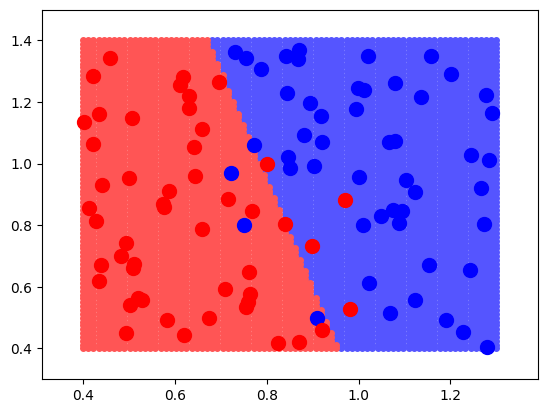

In [42]:
# # The first test training is already done. Let's see graphically what
# the result is.

# The test dots (first two rows) are picked up and passed to tensors to be able
# to calculate the output of the model
t_test_points = torch.from_numpy(dots_tst[:2, :].T)

# The model outputs are calculated
with torch.no_grad():
    model.eval()
    y_test = model.forward(t_test_points)

# Tensors are transformed into np-arrays for the my_plot function
y_test = y_test.numpy().round().T
test_block = np.concatenate((dots_tst[:2, :], y_test), axis=0)
hp.my_plot(test_block, dots_gt)

What you see above is the result of the fit achieved. The blue area should contain the dark blue dots, while the red area should contain the dark red dots. It is clear that it is not so; this fit is not good, but maybe it's not that bad for a first approximation, without making any consideration about the learning rate, the complexity of the network or the number of epochs to train.

## Final considerations

###  _train_ / _eval_ modes

Pytorch models have a _train_ (training) mode and an _eval_ (evaluation) mode. The difference is that in evaluation mode some layers that are only used for training are disabled (for example, the Dropout layers, which in this practice have not yet been used). You will have seen in the function _show_adjust_ above that it is put into evaluation mode; It is for the stated reason. By default, when a model is created it is in _train_ mode, but it is convenient to put it explicitly.

The way to do it is by doing:
 * `model.train()`  -> Select train mode
 * `model.eval()`   -> Select evaluation mode


### Work on CPU/GPU

It has been said at the beginning of the practice that pytorch is optimized to work with GPUs. To do this, all you have to do is pass the input data tensors and the model to the GPU, and train on it.
  Be careful, it is important to take into account that a tensor that is in the GPU can only be operated with other tensors that are in the GPU, through a model that is in the GPU. The same is applicable if the tensor is on the CPU. In short, either everything is on one side or it is on the other; but not in both:

 * model.cuda()  --> Move the model to the GPU (can also be applied to a tensor: tensor.cuda())
 * model.to('cuda')  --> Move the model to the GPU
 * model.cpu()  --> Move the model to the CPU
 * model.to('cpu')  --> Move the model to the CPU
 * torch.cuda.is_available  --> Return `True` wether GPU is available

Possibly the most general way to deal with the location of the tensors and the model on one or the other device (CPU or GPU) is as follows:

```
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
inputs.to(device)
labels.to(device)
```

In [ ]:
# Define the global variable 'device' to be used where appropriate
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)